In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2023-09-20 07:31:36--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.68.92, 3.5.3.196, 52.217.235.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.68.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  47.1MB/s    in 7m 27s  

2023-09-20 07:39:03 (41.2 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [ ]:
!mkdir coco2017

In [ ]:
!mkdir coco2017/images

In [ ]:
!unzip -j train2017.zip 'train2017/*' -d coco2017/images/train

Streaming output truncated to the last 5000 lines.
 extracting: coco2017/images/train/000000259556.jpg  
 extracting: coco2017/images/train/000000381931.jpg  
 extracting: coco2017/images/train/000000569592.jpg  
 extracting: coco2017/images/train/000000229396.jpg  
 extracting: coco2017/images/train/000000488990.jpg  
 extracting: coco2017/images/train/000000348684.jpg  
 extracting: coco2017/images/train/000000234031.jpg  
 extracting: coco2017/images/train/000000563584.jpg  
 extracting: coco2017/images/train/000000276069.jpg  
 extracting: coco2017/images/train/000000401194.jpg  
 extracting: coco2017/images/train/000000502089.jpg  
 extracting: coco2017/images/train/000000192183.jpg  
 extracting: coco2017/images/train/000000425127.jpg  
 extracting: coco2017/images/train/000000126766.jpg  
 extracting: coco2017/images/train/000000324161.jpg  
 extracting: coco2017/images/train/000000452746.jpg  
 extracting: coco2017/images/train/000000423782.jpg  
 extracting: coco2017/images/tr

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2023-09-20 07:49:52--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.234, 16.182.107.137, 52.217.205.113, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.234|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  46.6MB/s    in 17s     

2023-09-20 07:50:09 (45.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
!unzip -j val2017.zip 'val2017/*' -d coco2017/images/val

Streaming output truncated to the last 5000 lines.
 extracting: coco2017/images/val/000000212226.jpg  
 extracting: coco2017/images/val/000000231527.jpg  
 extracting: coco2017/images/val/000000578922.jpg  
 extracting: coco2017/images/val/000000062808.jpg  
 extracting: coco2017/images/val/000000119038.jpg  
 extracting: coco2017/images/val/000000114871.jpg  
 extracting: coco2017/images/val/000000463918.jpg  
 extracting: coco2017/images/val/000000365745.jpg  
 extracting: coco2017/images/val/000000320425.jpg  
 extracting: coco2017/images/val/000000481404.jpg  
 extracting: coco2017/images/val/000000314294.jpg  
 extracting: coco2017/images/val/000000335328.jpg  
 extracting: coco2017/images/val/000000513688.jpg  
 extracting: coco2017/images/val/000000158548.jpg  
 extracting: coco2017/images/val/000000132116.jpg  
 extracting: coco2017/images/val/000000415238.jpg  
 extracting: coco2017/images/val/000000321333.jpg  
 extracting: coco2017/images/val/000000081738.jpg  
 extracting: 

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2023-09-20 07:50:25--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.29.85, 16.182.75.57, 52.217.130.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.29.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  47.6MB/s    in 5.6s    

2023-09-20 07:50:31 (43.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!unzip annotations_trainval2017.zip -d coco2017/

Archive:  annotations_trainval2017.zip
  inflating: coco2017/annotations/instances_train2017.json  
  inflating: coco2017/annotations/instances_val2017.json  
  inflating: coco2017/annotations/captions_train2017.json  
  inflating: coco2017/annotations/captions_val2017.json  
  inflating: coco2017/annotations/person_keypoints_train2017.json  
  inflating: coco2017/annotations/person_keypoints_val2017.json  


In [1]:
from pycocotools.coco import COCO

import numpy as np
import random

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

2023-09-20 17:25:50.667808: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 17:25:50.799384: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 17:25:50.800934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 17:25:54.490350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
dataDir='./coco2017'


valannFile='{}/annotations/instances_val2017.json'.format(dataDir)
trainannFile='{}/annotations/instances_train2017.json'.format(dataDir)


In [ ]:
# val images

# initialize the COCO api for instance annotations
val_coco=COCO(valannFile)
# get all images
val_imgIds = val_coco.getImgIds()
# take 500 images because the instance is timing out
val_images = val_coco.loadImgs(val_imgIds)


loading annotations into memory...
Done (t=1.37s)
creating index...
index created!


In [ ]:
# train images

# initialize the COCO api for instance annotations
train_coco=COCO(trainannFile)
# get all images
train_imgIds = train_coco.getImgIds()
train_images = train_coco.loadImgs(train_imgIds)

loading annotations into memory...
Done (t=21.54s)
creating index...
index created!


In [ ]:
def getImage(imageObj, img_folder, input_image_size):
    # Read image
    img = tf.image.decode_image(open(f"{img_folder}/{imageObj['file_name']}", 'rb').read())
    # normalize image
    img = tf.cast(img, tf.float32) / 255.0
    # Resize
    img = tf.image.resize(img, input_image_size)
    return img


In [ ]:
def getBinaryMask(imageObj, coco, input_image_size):
    annIds = coco.getAnnIds(imgIds=imageObj['id'])
    anns = coco.loadAnns(annIds)
    mask = np.zeros(input_image_size)
    for a in range(len(anns)):
        new_mask =cv2.resize(coco.annToMask(anns[a]), input_image_size)

        #Threshold because resizing may cause extraneous values
        new_mask[new_mask >= 0.5] = 1
        new_mask[new_mask < 0.5] = 0

        mask = np.maximum(new_mask, mask)

    # Add extra dimension for parity with img size [X * X * 3]
    mask = mask.reshape(input_image_size[0], input_image_size[1], 1)
    return mask


In [115]:
def dataGeneratorCoco(images, coco, folder,
                      input_image_size=(224,224), batch_size=4, mode='train'):

    img_folder = '{}/images/{}'.format(folder, mode)
    dataset_size = len(images)
    catIds = coco.getCatIds()

    c = 0
    while(True):
        img = np.zeros((batch_size, input_image_size[0], input_image_size[1], 3)).astype('float')
        mask = np.zeros((batch_size, input_image_size[0], input_image_size[1], 1)).astype('float')

        for i in range(c, c+batch_size): #initially from 0 to batch_size, when c = 0
            imageObj = images[i]

            ### Retrieve Image ###
            train_img = getImage(imageObj, img_folder, input_image_size)

            ### Create Mask ###
            train_mask = getBinaryMask(imageObj, coco, input_image_size)

            # Add to respective batch sized arrays
            img[i-c] = train_img
            mask[i-c] = train_mask

        c+=batch_size
        if(c + batch_size >= dataset_size):
            c=0
            random.shuffle(images)
        yield img, mask


In [ ]:
def visualizeGenerator(gen):
    img, mask = next(gen)

    fig = plt.figure(figsize=(20, 10))
    outerGrid = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.1)

    for i in range(2):
        innerGrid = gridspec.GridSpecFromSubplotSpec(2, 2,
                        subplot_spec=outerGrid[i], wspace=0.05, hspace=0.05)

        for j in range(1):
            ax = plt.Subplot(fig, innerGrid[j])
            if(i==1):
                ax.imshow(img[j])
            else:
                ax.imshow(mask[j][:,:,0])

            ax.axis('off')
            fig.add_subplot(ax)
    plt.show()

In [116]:
val_gen = dataGeneratorCoco(val_images, val_coco, dataDir, mode='val', input_image_size=(224,224))

In [117]:
train_gen = dataGeneratorCoco(train_images, train_coco, dataDir, mode='train', input_image_size=(224,224))

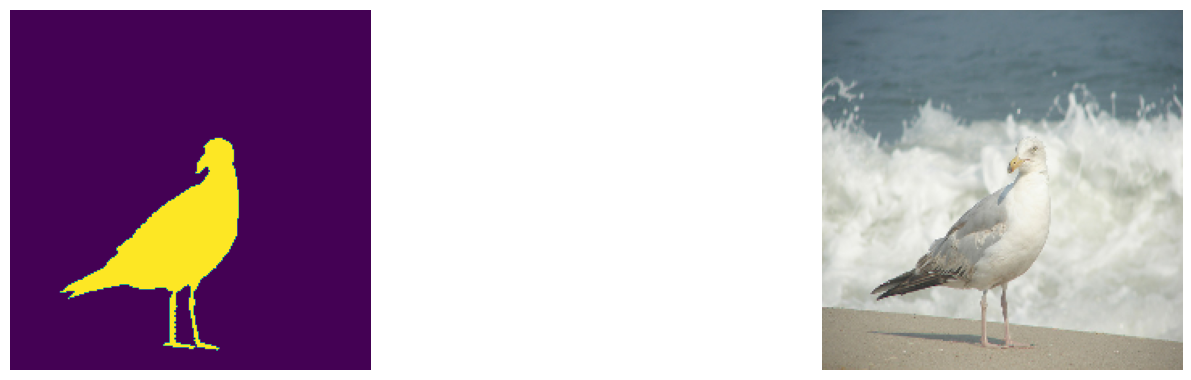

In [118]:
visualizeGenerator(val_gen)


Define The Model


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-0b68odzs
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-0b68odzs
  Resolved https://github.com/tensorflow/examples.git to commit 2741d0f2a345ef52e0de1d498de732f5dacbf2f0
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1694556533.224118390420868118806081040175592332373432988400-py3-none-any.whl size=301567 sha256=c79b98d026c43880b0400e5e6f0cd7a63617e4905bded1b318fa23fa12c68f59
  Stored in directory: /tmp/pip-ephem-wheel-cache-al43c_xg/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output



In [108]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False, weights='imagenet')

In [119]:
# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]

In [120]:
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

In [121]:
# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [122]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[224, 224, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

    # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  return tf.keras.Model(inputs=inputs, outputs=x)


In [ ]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [123]:
a = getImage(val_images[0], './coco2017/images/val', (224,224))
m = getBinaryMask(val_images[0], val_coco, (224,224))
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    l = model.predict(tf.expand_dims(a, 0))
    l = create_mask(l)
    display_list = [a, m, l]
    for i in range(len(display_list)):
      plt.subplot(1, len(display_list), i+1)
      plt.title(title[i])
      plt.imshow(display_list[i])
      plt.axis('off')
    plt.show()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

1/1 [==============================] - 0s 107ms/step


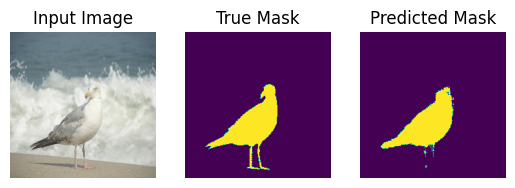


Sample Prediction after epoch 1

29571/29571 [==============================] - 2956s 100ms/step - loss: 0.2793 - accuracy: 0.7179 - val_loss: 0.2794 - val_accuracy: 0.7525
Epoch 2/10
25289/29571 [========================>.....] - ETA: 6:41 - loss: 0.2732 - accuracy: 0.7174

In [ ]:
# Set your parameters
n_epochs = 10

steps_per_epoch = len(train_images) // 4
validation_steps = len(val_images) // 4

# Start the training process
history = model.fit(x = train_gen,
                validation_data = val_gen,
                steps_per_epoch = steps_per_epoch,
                validation_steps = validation_steps,
                epochs = n_epochs,
                batch_size=4,
                callbacks=[DisplayCallback()],
                verbose = True)



In [1]:
model.save('coco_set_unet_semantic_segmentation_224_224.keras')

NameError: ignored

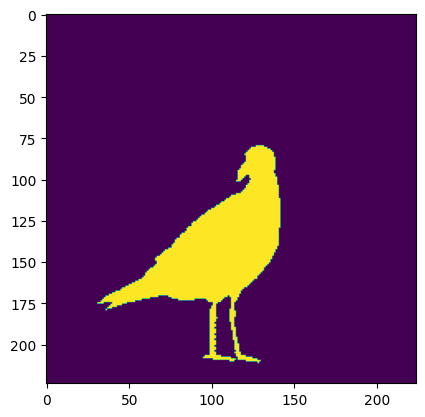

In [112]:
a = getImage(val_images[0], './coco2017/images/val', (224,224))
plt.imshow(a)
m = getBinaryMask(val_images[0], val_coco, (224,224))
plt.imshow(m)

In [113]:
l = model.predict(tf.expand_dims(a, 0))


1/1 [==============================] - 2s 2s/step


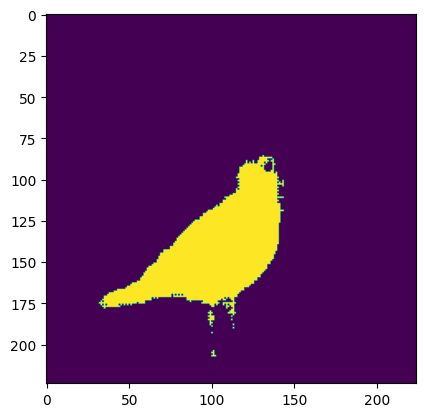

In [124]:
plt.imshow(create_mask(l))